In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
import scipy.stats as st

In [2]:
plt.rcParams["figure.figsize"] = (9,7)

# Reviewing Basic Statistics III - Inference

In this part we are going to use a dataset discussed in William Gosset's classic paper: *The probable Error of a Mean*. It describes an experiment in which two sleeping aides are administered during the course of a clinical trial to a group of 10 patients.   
There are two drugs and we're looking at the increase over control for each of these 10 individuals with each drug. 

The form of the data frame is 20 observations x 3 variables:
1. extra sleep obtained as a consequence of taking the drug (“extra”), 
2. a label telling us which drug was taken (“group”), and 
3. patient IDs ("ID").


In [3]:
df = pd.read_csv('../dataset/sleep.csv', usecols=['extra', 'group', 'ID'])
df.head()

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5


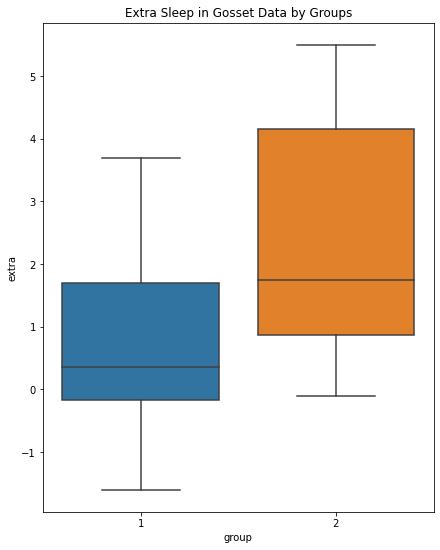

In [4]:
# Of course always plot your data
plt.figure(figsize=(7,9)) 
sns.boxplot(x="group", y="extra", data=df)
plt.title('Extra Sleep in Gosset Data by Groups');

it looks like the second group, the second drug has a pretty clear advantage over the first.   
There isn't a big difference in heterogenity, however the median in the second group seems to be higher. The bar inside the box plot represents the median and not the mean.  

That was the visual impression, what we need now is to follow up with a standard statistical test.

In [5]:
# Test your hypothesis
extra1 = df[df['group'] == 1]['extra'].values
extra2 = df[df['group'] == 2]['extra'].values
# Paired t-test
st.ttest_rel(extra1, extra2)

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.00283289019738427)

We have a quite high negative t-value (if that were a z value from a normal distribution, it would be quite quite large) How large it is with a T distribution, dependeds on your sample size. Thus, we tend to believe that the visual evidence in the box plot is supported by the statistical approach. The p-value is quite small and our data are significant at the customary of $\alpha = 0.01$
> p < $\alpha$ ➤ reject
  
The p value we obtain is less than the standard nickel (<.05). It's even less than point zero one. These data are highly significant.     
So we are going to go with the Alternative hypothesis that indeed there is a difference between the two drugs.


It is also good to report a confidence interval and another approach to a test like this would be to calculate the 95\% confidence interval.  
Our degree of freedom is: `df = Nr. of patients - 1 = 9` 

In [34]:
# Mean of the differences:
np.mean(extra1 - extra2)

-1.58

In [35]:
# 95% confidence interval
st.t.interval(alpha=.95, df=9, loc=np.mean(extra1 - extra2), scale=st.sem(extra1 - extra2))
# with st.sem: standard error of the mean

(-2.4598857632547286, -0.7001142367452713)

<div class="alert alert-block alert-info">
<b>💡 General Framework for Hypothesis Tests:</b>
    <ul>
        <li> State clearly what your variables are (define your terms).</li>
        <li> State the null and alternative hypotheses.</li>
        <li> Decide upon a level of significance, $\alpha$.</li>
        <li> Compute a test statistic (z, t, chi-square, and F are popular stats)</li>
        <li> Find the $p-$value corresponding to your test statistic (for left/right/or two tailed test).</li>
        <li>Form a conclusion: if $p < \alpha$ (improbable data) reject H0 otherwise do not reject. We typically do not accept, just like the courts never say that someone is innocent</li>
    </ul>
</div>

<div class="alert alert-block alert-success">
    <b> In this Lab we learned to:</b>
<ul>
    <li> Perform a hypothesis test concerning means ✅  </li>
    </ul>
</div>